In [1]:
import pandas as pd

In [3]:
df_language_url = pd.read_csv('data/lang_url.csv')
print(df_language_url.shape)
df_language_url.head()

(58762, 2)


,language,url
0,English,https://aclanthology.org/2023.vardial-1.1
1,Spanish,https://aclanthology.org/2023.vardial-1.1
2,Spanish (Canary Islands),https://aclanthology.org/2023.vardial-1.1
3,Arabic (Chadian),https://aclanthology.org/2023.vardial-1.2
4,Arabic (Beirut),https://aclanthology.org/2023.vardial-1.2


In [4]:
df_language_url['no_brackets'] = df_language_url.language.apply(lambda x: x.split('(')[0].strip())
#df_unique = df_language_url[['no_brackets', 'url']].drop_duplicates(subset=['no_brackets', 'url'])
print(df_language_url.shape)
df_language_url.head()

(58762, 3)


,language,url,no_brackets
0,English,https://aclanthology.org/2023.vardial-1.1,English
1,Spanish,https://aclanthology.org/2023.vardial-1.1,Spanish
2,Spanish (Canary Islands),https://aclanthology.org/2023.vardial-1.1,Spanish
3,Arabic (Chadian),https://aclanthology.org/2023.vardial-1.2,Arabic
4,Arabic (Beirut),https://aclanthology.org/2023.vardial-1.2,Arabic


In [5]:
df_new = df_language_url[df_language_url.no_brackets != "One"]

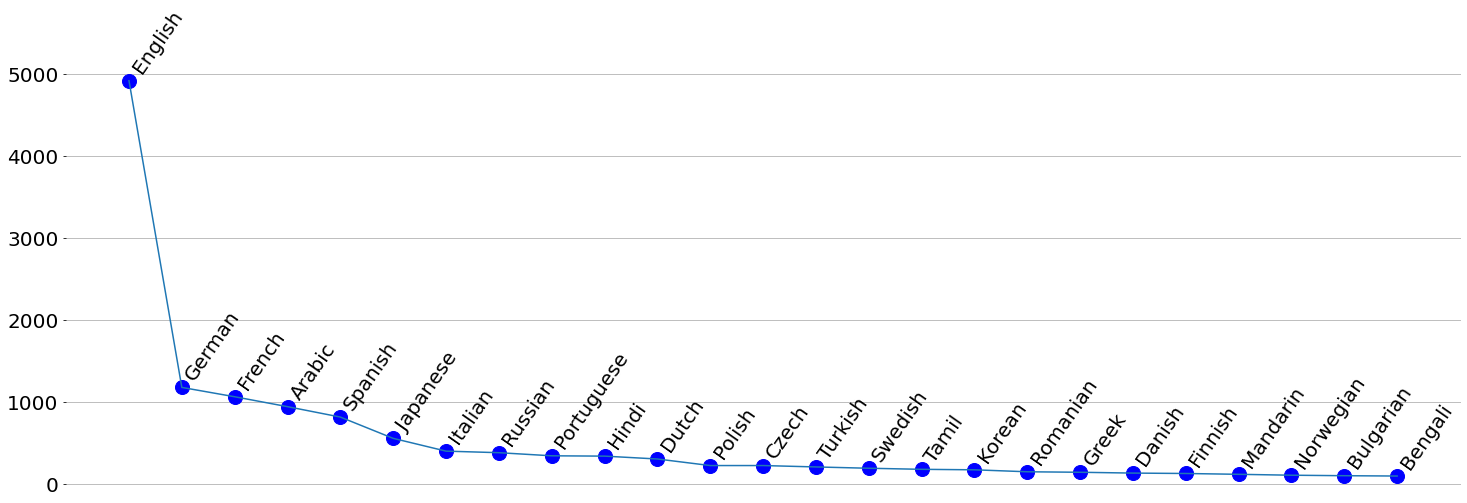

In [8]:
import matplotlib.pyplot as plt

citations = df_new[["url", "no_brackets"]].drop_duplicates().no_brackets.value_counts().tolist()
languages = df_new[["url", "no_brackets"]].drop_duplicates().no_brackets.value_counts().index.tolist()

plt.figure(figsize=(25, 8))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

plt.yticks(fontsize=20)

plt.plot(citations[:25], 'bo', markersize=14)
plt.plot(citations[:25])

for i, txt in enumerate(languages[:25]):
    plt.annotate(txt, (i, citations[i]+100), fontsize=20, rotation = 55)


for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.grid(axis="y")

#plt.show()
plt.savefig("data/lang_distribution.png",
            bbox_inches ="tight",
           dpi=100)